# R plots

In [1]:
# install.packages("reshape2")

In [2]:
library('magrittr')
library("reshape2")
source("BulletGraph.R", local=TRUE)

In [3]:
birthrate <- read.csv('ex6-2/birth-rate.csv')
crime <- read.csv('ex6-2/crimeratesbystate-formatted.csv')
education <- read.csv('ex6-2/education.csv') 

## R - Histogram

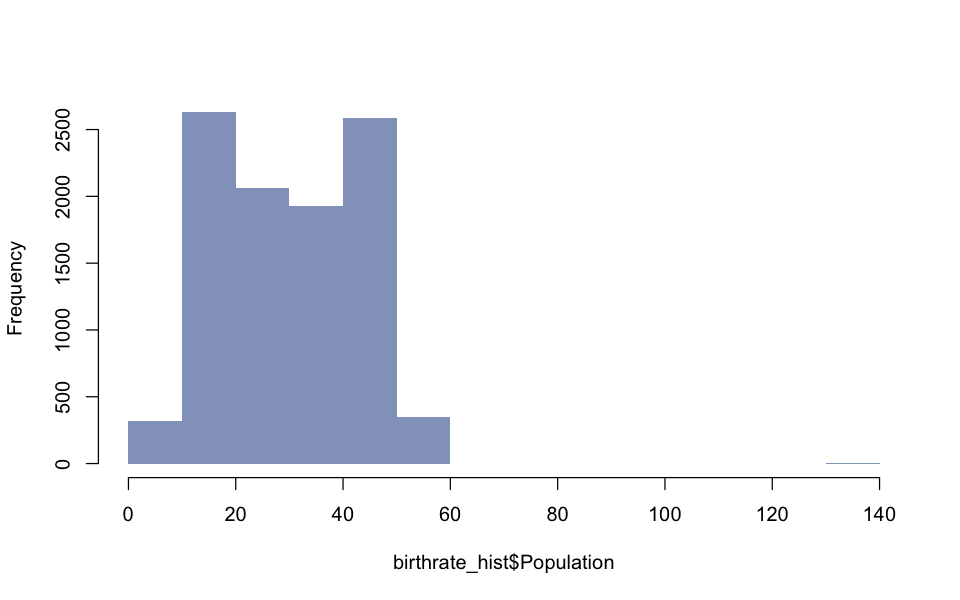

In [4]:
options(repr.plot.width = 8, repr.plot.height = 5)

birthrate_hist <- reshape2::melt(birthrate, id=c("Country")) %>%
  dplyr::mutate("Country" = as.character(Country),
                "Year" = as.character(variable),
                "Population" = value,
                "Population_int" = ceiling(value)) %>% 
  dplyr::select(c("Country","Year","Population", "Population_int"))

hist(birthrate_hist$Population, col=rgb(0,0.2,0.5,0.5) , border=F , main="")

## R - Box plot

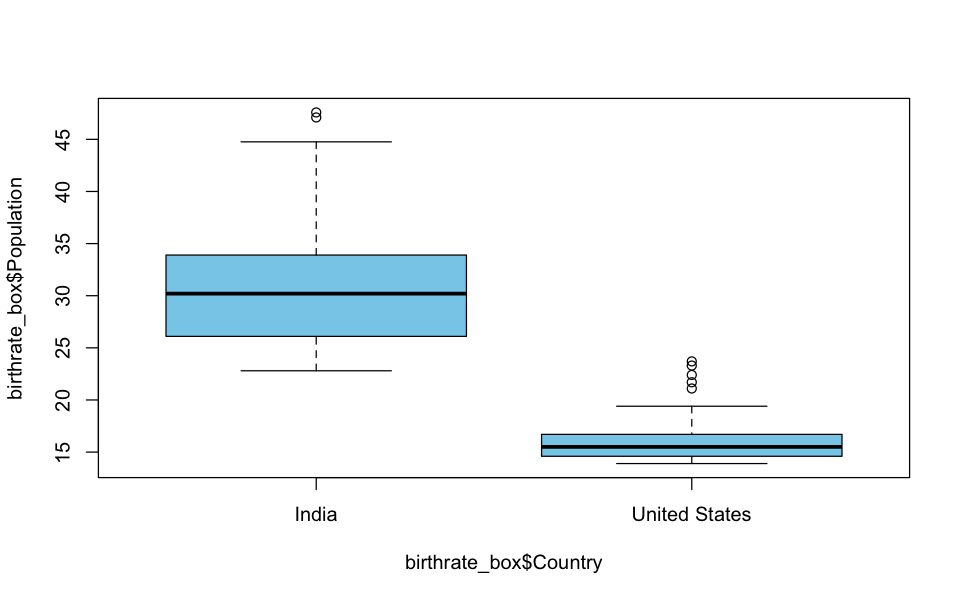

In [5]:
birthrate_box <- birthrate_hist %>% 
  dplyr::filter(Country %in% c("United States", "India"))

boxplot(birthrate_box$Population ~ birthrate_box$Country , col="skyblue")

## R - Bullet graph

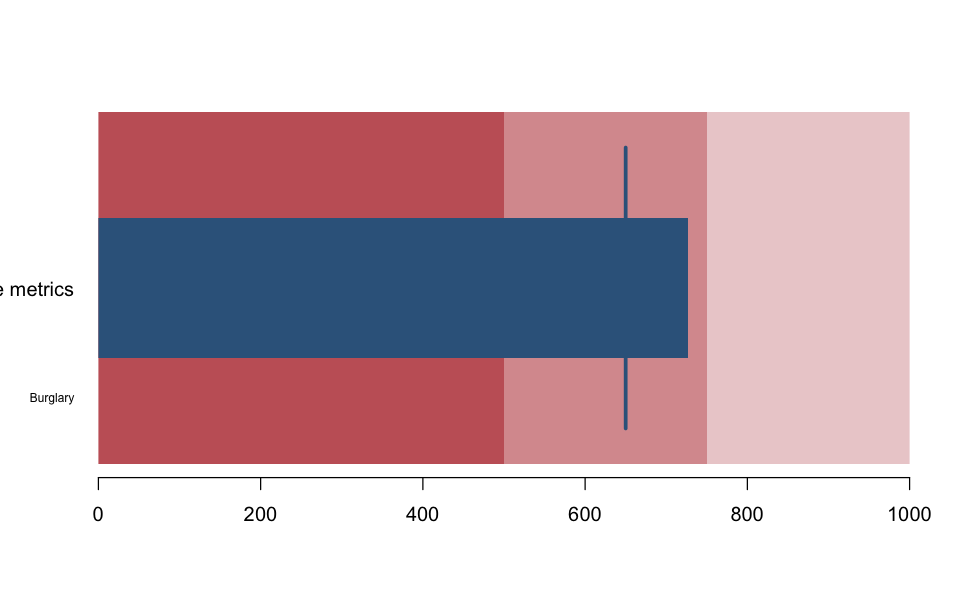

In [6]:
crime_bullet <- crime %>% 
  dplyr::filter(stringr::str_trim(state, "both") == "United States") %>% 
  dplyr::select(c(state, burglary))
bulletgraph(x=crime_bullet$burglary,ref=650,limits=c(0,500,750,1000),
            name= "USA Crime metrics",subname="Burglary",
            col="steelblue4",shades="firebrick")


## R - Donut chart

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


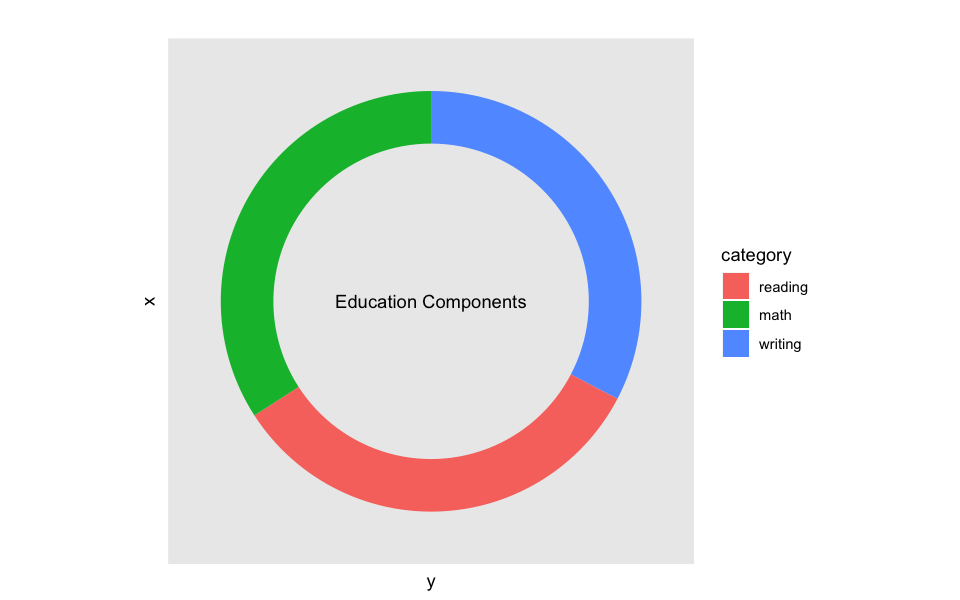

In [7]:
education_donut <- education %>% 
  dplyr::filter(stringr::str_trim(state, "both") == "United States") %>% 
  reshape2::melt(id=c("state")) %>% 
  dplyr::rename("category" = variable) %>% 
  dplyr::filter(category %in% c("reading","math","writing")) %>% 
  dplyr::select(-state)

# add addition columns, needed for drawing with geom_rect
education_donut$fraction = education_donut$value / sum(education_donut$value)
education_donut = education_donut[order(education_donut$fraction), ]
education_donut$ymax = cumsum(education_donut$fraction)
education_donut$ymin = c(0, head(education_donut$ymax, n=-1))

# make the plot
ggplot2::ggplot(education_donut, ggplot2::aes(fill=category, ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
  ggplot2::geom_rect() +
  ggplot2::coord_polar(theta="y") +
  ggplot2::xlim(c(0, 4)) +
  ggplot2::theme(panel.grid=ggplot2::element_blank()) +
  ggplot2::theme(axis.text=ggplot2::element_blank()) +
  ggplot2::theme(axis.ticks=ggplot2::element_blank()) +
  ggplot2::annotate("text", x = 0, y = 0, label = "Education Components") +
  ggplot2::labs(title="")

## R - Pie chart

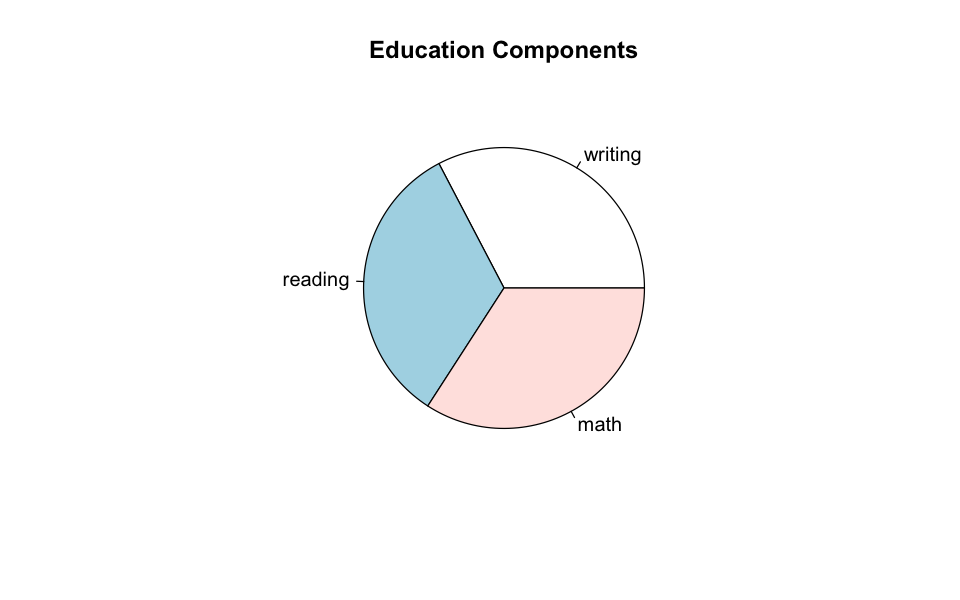

In [8]:
# pie chart
slices <- education_donut$value
lbls <- education_donut$category
pie(slices, labels = lbls, main="Education Components")